In [71]:
import pickle
import sys, os
sys.path.insert(1, os.path.join(sys.path[0], ".."))
from modt.modt import MoDT
from modt._initialization import *
from modt.visualization import *
from modt.utility import *

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 12

COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR

In [46]:
#data_input = pickle.load(open("../datasets/generated6_input.np", "rb"))
#data_target = pickle.load(open("../datasets/generated6_target.np", "rb"))
data_input = pickle.load(open("../datasets/iris_input.pd", "rb"))
data_target = pickle.load(open("../datasets/iris_target.pd", "rb"))
#data_input = pickle.load(open("../datasets/breast_cancer_input.np", "rb"))
#data_target = pickle.load(open("../datasets/breast_cancer_target.np", "rb"))
#data_input = pickle.load(open("../datasets/bank_input.pd", "rb"))  # Pd & Categoric features
#data_target = pickle.load(open("../datasets/bank_target.pd", "rb"))
#data_input = pickle.load(open("../datasets/banknote_input.pd", "rb"))  # Pd & numeric features
#data_target = pickle.load(open("../datasets/banknote_target.pd", "rb"))
#data_input = pickle.load(open("../datasets/cars_input.pd", "rb"))
#data_target = pickle.load(open("../datasets/cars_target.pd", "rb"))
#data_input = pickle.load(open("../datasets/students_input.pd", "rb"))
#data_target = pickle.load(open("../datasets/students_target.pd", "rb"))
parameters = {
    "X": data_input,
    "y": data_target,
    "n_experts": 2,
    "iterations": 100,
    "max_depth": 1,
    "init_learning_rate": 100,
    "learning_rate_decay": 0.995,
    "initialization_method": "random",
    "feature_names": None,
    "class_names": None,
    "use_2_dim_gate_based_on": "feature_importance_lda",
    "use_2_dim_clustering": True,
    "black_box_algorithm": None,
    "save_likelihood": True,
    }

parameters_fit = {
    "optimization_method": "ridge_regression",
    "early_stopping": False,
    "use_posterior": False,
    }

modt = MoDT(**parameters)
modt.fit(**parameters_fit)

C:\Users\Robert\Code\mixture-of-decision-trees\plotting\..\modt\visualization.py:104: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_x_ticks)
C:\Users\Robert\Code\mixture-of-decision-trees\plotting\..\modt\visualization.py:110: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(new_y_ticks)


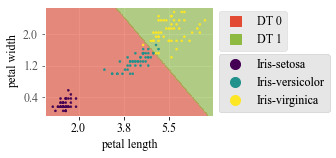

In [73]:
fig = plt.gcf()
fig.set_size_inches(3, 2)
plot_gating(modt,iteration=modt.best_iteration,title=False,axis_digits=True,jitter=False,inverse_transform_standardization=True,legend=True,legend_classes=True)
plt.savefig("output/iris_gate.pdf", bbox_inches="tight", dpi=300)

In [68]:
print("Accuracy disjoint DTs:", modt.score_internal_disjoint())
fig = plt.gcf()
fig.set_size_inches(17,4)
plot_training(modt)

Accuracy disjoint DTs: 0.9733333333333334


AttributeError: 'NoneType' object has no attribute 'gcf'

In [66]:
del fig

In [26]:
for depth in [1,2,3,4]:
    print("Depth: {} accuracy: {}".format(depth, tree_accuracy(modt.X,modt.y,depth)))

Depth: 1 accuracy: 0.6666666666666666
Depth: 2 accuracy: 0.96
Depth: 3 accuracy: 0.9733333333333334
Depth: 4 accuracy: 0.9933333333333333


In [27]:
#fig = plt.gcf()
#fig.set_size_inches(5.8, 1.2)
#accuracy_line(modt)
#plt.savefig("output/accuracy.pdf", bbox_inches="tight")
#theta_development(modt)
#plt.savefig("output/theta.pdf", bbox_inches="tight")

In [28]:
#fig = plt.gcf()
#fig.set_size_inches(5.8, 1.2)
#plt.plot(modt.all_likelihood)
#plt.savefig("output/loss.pdf", bbox_inches="tight")

In [70]:
fig = plt.gcf()
fig.set_size_inches(16.5, 4)
plt.subplot(1, 3, 1)
plot_initialization(modt)
plt.subplot(1, 3, 2)
#visualize_gating(modt,iteration=0, axis_ticks=True)
plot_gating(modt,iteration=0,title=True,axis_digits=False,inverse_transform_standardization=False)
plt.subplot(1, 3, 3)
plot_gating(modt,iteration=modt.completed_iterations,title=True,axis_digits=False,inverse_transform_standardization=False)

AttributeError: 'NoneType' object has no attribute 'gcf'

In [13]:
modt.best_iteration

99

In [14]:
modt.all_DTs[48]

[DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=1)]

In [15]:
DTs = modt.all_DTs[modt.best_iteration]

In [16]:
if parameters["X"].shape[1] == 2:
    fig = plt.gcf()
    fig.set_size_inches(17, 4)
    plt.subplot(1, 2, 1)
    plot_gating(modt,iteration=modt.best_iteration,title=False,axis_digits=True,inverse_transform_standardization=False)
    plt.subplot(1, 2, 2)
    visualize_decision_area(modt)

In [17]:
visualize_decision_area_old(modt.predict, modt.X_original, modt.y, enable_scatter=True, axis_digits=True)

NameError: name 'visualize_decision_area_old' is not defined

[Text(167.4, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.109\nsamples = 52\nvalue = [0, 3, 49]'),
 Text(83.7, 54.360000000000014, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

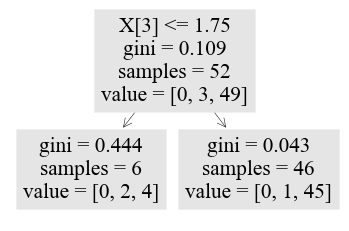

In [18]:
tree.plot_tree(modt.DT_experts_disjoint[0])

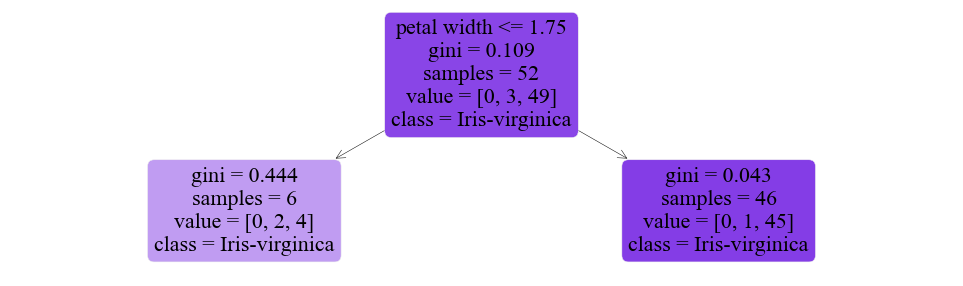

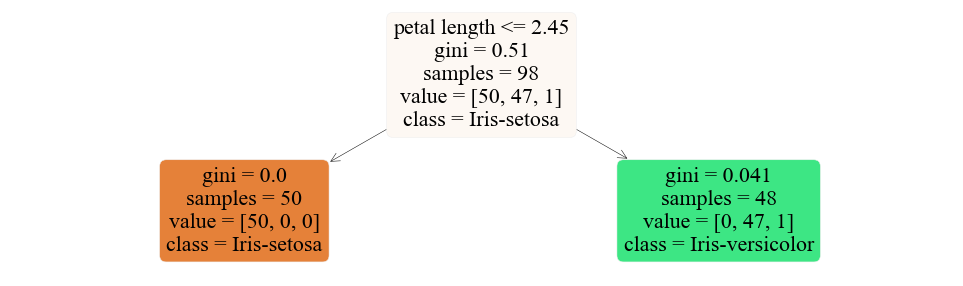

In [19]:
for expert in range(0,modt.n_experts):
    plot_disjoint_dt(modt,expert=expert,size=(17,5))

In [56]:
modt.train_disjoint_trees(modt.best_iteration, tree_algorithm="sklearn_asymmetric")

In [69]:
plot_dt_dtreeviz(modt,0,colors="visible", asymmetric=True, fancy=False)

In [52]:
plot_dt_dtreeviz(modt,1,colors="visible", asymmetric=True, fancy=False)

In [53]:
modt.train_disjoint_trees(modt.best_iteration, tree_algorithm="optimal_trees")

In [54]:
modt.DT_experts_alternative_algorithm[0].get_learner()

Fitted OptimalTreeClassifier:
  1) Split: petal length < 2.45
    2) Predict: Iris-setosa (100.00%), [50,0,0], 50 points, error 0
    3) Predict: Iris-versicolor (97.92%), [0,47,1], 48 points, error 0.02083

In [ ]:
from celluloid import Camera # Codex needed on windows: https://ffmpeg.org/download.html
from IPython.display import HTML
fig = plt.figure(figsize=(8,4))

camera = Camera(fig)
for i in range(0,parameters["iterations"]): 
    plot_gating(modt,iteration=i,title=False,axis_digits=False,inverse_transform_standardization=False)
    #visualize_gating_animation(fig,modt.get_expert_iteration,modt.X,modt.y,i,low_alpha=False)
    camera.snap()
animation = camera.animate()

HTML(animation.to_html5_video())